<a href="https://colab.research.google.com/github/SUYAMBULAKSHMI-VENKATESAN/DAMAKA/blob/main/Segmentation_Edgedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+----------------+-----------------------+----------------------+----------------+--------+-----------+
| Technique      | Preprocessing Param   | Threshold / Kernel   | Extra Params   |   Mean |   Std Dev |
+================+=======================+======================+================+========+===========+
| Blurred Image  | (5, 5)                | -                    | -              |  98.23 |     29.66 |
+----------------+-----------------------+----------------------+----------------+--------+-----------+
| Canny Edge     | (5, 5)                | 50-150               | Aperture=3     |   1.48 |     19.34 |
+----------------+-----------------------+----------------------+----------------+--------+-----------+
| Sobel Edge     | (5, 5)                | ksize=3              | dx=1, dy=1     |  13.28 |     22.07 |
+----------------+-----------------------+----------------------+----------------+--------+-----------+
| Laplacian Edge | (5, 5)                | ksize=3              

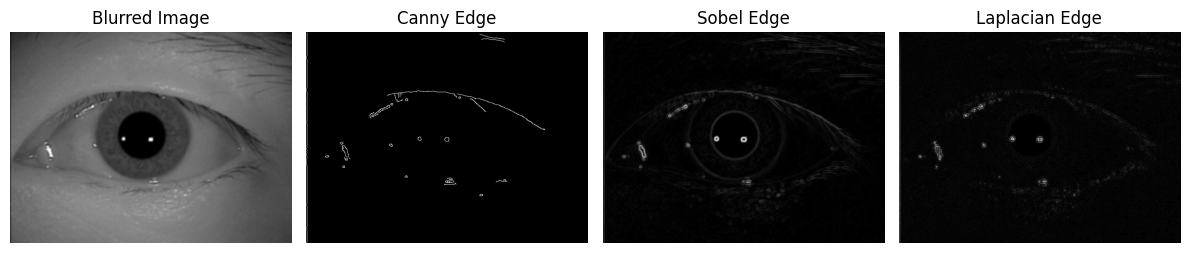

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def apply_edge_detection(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    # Common preprocessing - Gaussian Blur
    blur_kernel_size = (5, 5)
    blurred_image = cv2.GaussianBlur(image, blur_kernel_size, 0)

    # Parameters for Canny
    threshold1 = 50
    threshold2 = 150
    aperture_size = 3

    # Apply Canny Edge Detection
    canny_edges = cv2.Canny(blurred_image, threshold1, threshold2, apertureSize=aperture_size)

    # Apply Sobel Edge Detection
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    # Apply Laplacian Edge Detection
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
    laplacian_abs = cv2.convertScaleAbs(laplacian)

    # Prepare metrics
    table_data = [
        ["Blurred Image", str(blur_kernel_size), "-", "-", f"{np.mean(blurred_image):.2f}", f"{np.std(blurred_image):.2f}"],
        ["Canny Edge", str(blur_kernel_size), f"{threshold1}-{threshold2}", f"Aperture={aperture_size}", f"{np.mean(canny_edges):.2f}", f"{np.std(canny_edges):.2f}"],
        ["Sobel Edge", str(blur_kernel_size), "ksize=3", "dx=1, dy=1", f"{np.mean(sobel_combined):.2f}", f"{np.std(sobel_combined):.2f}"],
        ["Laplacian Edge", str(blur_kernel_size), "ksize=3", "-", f"{np.mean(laplacian_abs):.2f}", f"{np.std(laplacian_abs):.2f}"],
    ]

    headers = ["Technique", "Preprocessing Param", "Threshold / Kernel", "Extra Params", "Mean", "Std Dev"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Display results
    titles = ["Blurred Image", "Canny Edge", "Sobel Edge", "Laplacian Edge"]
    images = [blurred_image, canny_edges, sobel_combined, laplacian_abs]

    plt.figure(figsize=(12, 6))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    return table_data

# Example usage:
result = apply_edge_detection("/content/S6000S00.jpg")